In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mis
import seaborn as sns
import os
import nltk
from wordcloud import WordCloud
import os
os.chdir(r"D:\AAAAAAA\NLP Course\11_Natural Language Processing\Projects For NLP\Data\Reviews.csv")

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from transformers import pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import classification_report , accuracy_score 
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
from xgboost import XGBClassifier

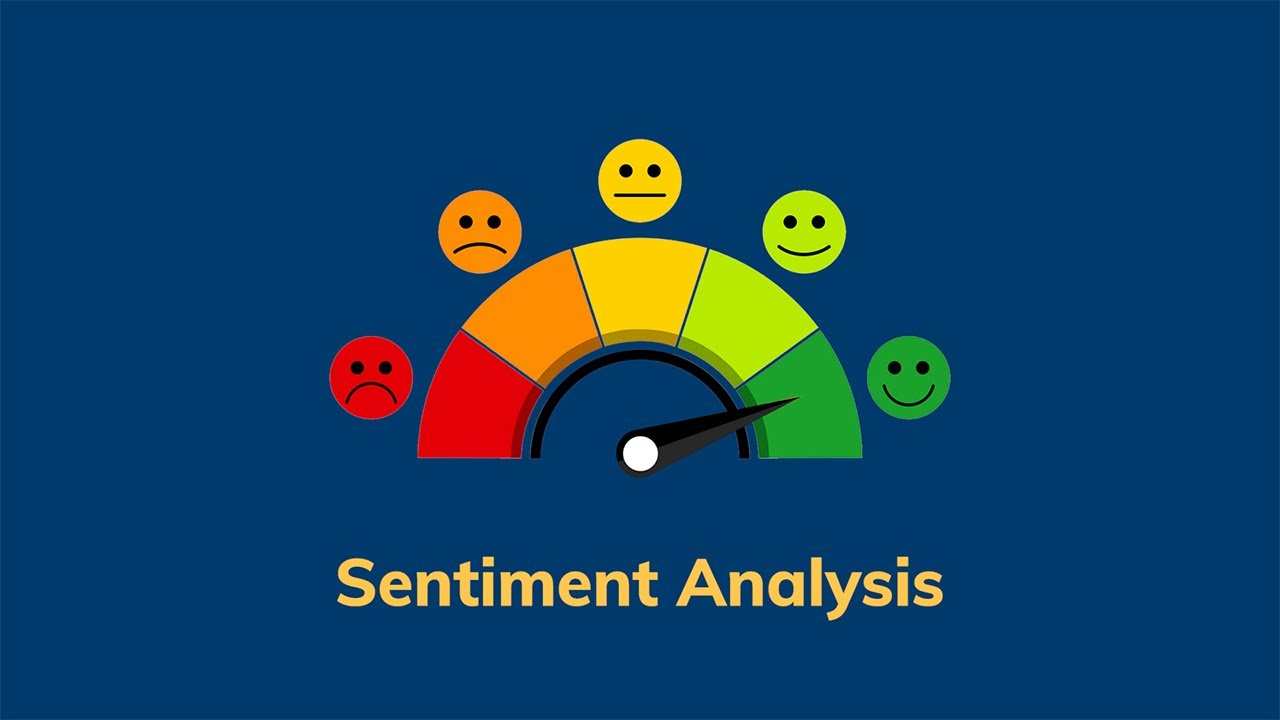

Sure! Here’s a detailed description and explanation of your DataFrame, focusing on how it relates to the sentiment analysis of Amazon reviews using Natural Language Processing (NLP) and the Hugging Face 🤗 Transformers library.

---

### DataFrame Overview for Sentiment Analysis of Amazon Reviews

#### Structure of the DataFrame
Your DataFrame contains **568,454 entries** (rows) and **10 columns** (features), providing a comprehensive dataset for analyzing customer sentiments based on Amazon product reviews. Here’s a breakdown of each column:

| #  | Column                     | Non-Null Count   | Dtype   | Description |
|----|---------------------------|------------------|---------|-------------|
| 0  | **Id**                    | 568454 non-null  | int64   | A unique identifier for each review entry. This can be useful for tracking and referencing specific reviews. |
| 1  | **ProductId**             | 568454 non-null  | object  | A unique identifier for each product. This helps in categorizing reviews by product and is crucial for analyzing sentiment per product. |
| 2  | **UserId**                | 568454 non-null  | object  | The unique identifier for each user who submitted the review. Useful for identifying user behavior and patterns. |
| 3  | **ProfileName**           | 568428 non-null  | object  | The display name of the user. This provides additional context about the reviewer, but it may contain missing values. |
| 4  | **HelpfulnessNumerator**  | 568454 non-null  | int64   | The numerator used to calculate the helpfulness ratio of the review (i.e., the number of users who found the review helpful). |
| 5  | **HelpfulnessDenominator**| 568454 non-null  | int64   | The denominator used to calculate the helpfulness ratio of the review. |
| 6  | **Score**                 | 568454 non-null  | int64   | The rating score given by the user, typically ranging from 1 to 5. This can serve as a target variable for sentiment classification (e.g., scores 1-2 as negative, 3 as neutral, and 4-5 as positive). |
| 7  | **Time**                  | 568454 non-null  | int64   | The timestamp indicating when the review was submitted, useful for analyzing trends over time. |
| 8  | **Summary**               | 568427 non-null  | object  | A brief summary of the review, providing an overview that can be useful for quick sentiment assessments. This column contains some missing values. |
| 9  | **Text**                  | 568454 non-null  | object  | The full text of the review. This is the primary focus for sentiment analysis, as it contains the user's detailed opinion about the product. |

#### Importance of Each Column
1. **Id:** Facilitates tracking and referencing individual reviews.
2. **ProductId:** Essential for analyzing sentiment based on specific products.
3. **UserId:** Enables understanding user-specific sentiment patterns and behaviors.
4. **ProfileName:** Provides context but is secondary to review content for sentiment analysis.
5. **HelpfulnessNumerator & HelpfulnessDenominator:** Useful for gauging the perceived helpfulness of reviews, which can correlate with sentiment.
6. **Score:** Directly indicates sentiment; can be converted to categorical labels for classification.
7. **Time:** Allows analysis of trends and changes in sentiment over time.
8. **Summary:** Offers a concise view of sentiment; can be utilized alongside the text for enhanced understanding.
9. **Text:** The core of sentiment analysis, where NLP techniques will be applied to classify sentiments.

#### Application in Sentiment Analysis
To perform sentiment analysis on this dataset using the Hugging Face 🤗 Transformers library, follow these steps:

1. **Data Preprocessing:**
   - Handle missing values in the `ProfileName` and `Summary` columns (if necessary).
   - Clean the `Text` column by removing any irrelevant characters or formatting issues.
   - Encode the `Score` into sentiment categories (e.g., 1-2 = Negative, 3 = Neutral, 4-5 = Positive).

2. **Model Selection:**
   - Use a pre-trained transformer model (like BERT or DistilBERT) from the 🤗 Transformers library.
   - Fine-tune the model using the `Text` column as input and the encoded `Score` as the target output.

3. **Training and Evaluation:**
   - Split the data into training, validation, and test sets.
   - Train the model, evaluate its performance using metrics such as accuracy and F1-score, and tune hyperparameters to improve results.

4. **Deployment:**
   - Implement a web application to allow users to input new reviews and get sentiment predictions based on the trained model.

### Conclusion
This DataFrame serves as a rich resource for sentiment analysis of Amazon reviews, providing essential information to train a model that can classify sentiments effectively. By leveraging the power of NLP and transformers, we can derive valuable insights from customer feedback, aiding in product improvements and customer satisfaction.

--- 

# 1. Text Preprocessing
### Lowercase Conversion
### Removal of Punctuation
### Removal of Numerical Expressions
### Removal of Stopwords
### Removal of Infrequent Words
### Tokenization
### Lemmatization

# 2. Text Visualization
### Calculation of Term Frequencies
### Barplot Visualization
### WordCloud Visualization
### WordCloud by Templates Visualization
# 3. Sentiment Analysis
### Creation of SentimentIntensityAnalyzer
### Analysis of Polarity Scores
# 4. Preparation for Machine Learning
### Train-Test Split
### Numerical Representation of Data

In [2]:
path = r"Reviews.csv"

if os.path.exists(path) :
    df = pd.read_csv(path)
    print(df.head())
    
else :
    print("Sorry , Your File Not Found.")


   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [3]:
df.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [4]:
df.tail(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568444,568445,B001EO7N10,A2SD7TY3IOX69B,"BayBay ""BayBay Knows Best""",3,3,5,1245369600,Best Value for Chinese 5 Spice,"As a foodie, I use a lot of Chinese 5 Spice po..."
568445,568446,B001EO7N10,A2E5C8TTAED4CQ,S. Linkletter,2,2,5,1268006400,Five Spice Powder,"You can make this mix yourself, but the Star A..."
568446,568447,B001EO7N10,A2P9W8T7NTLG2Z,Andy,0,0,2,1328918400,Mixed wrong,I had ordered some of these a few months back ...
568447,568448,B001EO7N10,APWCOAVILK94B,"Real Named Person ""wowzee""",0,0,5,1322524800,"If its all natural, this is like panacea of Sp...","Hoping there is no MSG in this, this tastes ex..."
568448,568449,B001EO7N10,A1F6BHEYB7R6R7,James Braley,0,0,5,1308096000,Very large ground spice jars.,My only complaint is that there's so much of i...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


## Exploratory Data Analysis ❤️

In [5]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [1]:
df["Score"].value_counts()

NameError: name 'df' is not defined

In [6]:
df.shape

(568454, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,568454.0,2.842275e+05,1.640987e+05,1.0,1.421142e+05,2.842275e+05,4.263408e+05,5.684540e+05
HelpfulnessNumerator,568454.0,1.743817e+00,7.636513e+00,0.0,0.000000e+00,0.000000e+00,2.000000e+00,8.660000e+02
HelpfulnessDenominator,568454.0,2.228810e+00,8.289740e+00,0.0,0.000000e+00,1.000000e+00,2.000000e+00,9.230000e+02
Score,568454.0,4.183199e+00,1.310436e+00,1.0,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
Time,568454.0,1.296257e+09,4.804331e+07,939340800.0,1.271290e+09,1.311120e+09,1.332720e+09,1.351210e+09


In [9]:
df.describe(include="object").T

,count,unique,top,freq
ProductId,568454,74258,B007JFMH8M,913
UserId,568454,256059,A3OXHLG6DIBRW8,448
ProfileName,568428,218415,"C. F. Hill ""CFH""",451
Summary,568427,295742,Delicious!,2462
Text,568454,393579,"This review will make me sound really stupid, ...",199


In [10]:
def text_preprocess(text, infrequent_threshold=2):
    # 1. Lowercase Conversion
    text = text.lower()
    
    # 2. Removal of Punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # 3. Removal of Numerical Expressions
    text = re.sub(r'\d+', '', text)
    
    # 4. Tokenization
    words = word_tokenize(text)
    
    # 5. Removal of Stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    

    # 6. Removal of Infrequent Words
    word_counts = Counter(words)
    words = [word for word in words if word_counts[word] >= infrequent_threshold]
    
    # 7. Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join tokens back to form the cleaned text
    cleaned_text = ' '.join(words)
    
    return cleaned_text


df["length_of_Text"] = df["Text"].apply(len)
df["cleaned_text"] = df["Text"].apply(text_preprocess)
df["length_of_cleaned_text"] = df["cleaned_text"].apply(len)


In [11]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,length_of_Text,cleaned_text,length_of_cleaned_text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263,product better product better,29
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190,product jumbo product jumbo,27
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509,tiny tiny treat witch treat witch,33
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219,,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,140,great taffy great taffy taffy,29


## Get Quick Overview🧐😉

In [12]:
print(f"Number of Records is == {df.shape[0]}")
print(f"Number of Columns is == {df.shape[1]}")

Number of Records is == 568454
Number of Columns is == 13


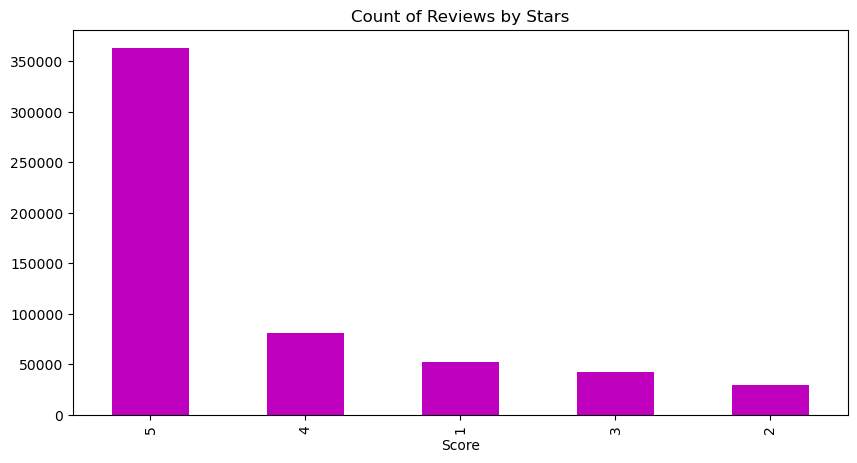

In [13]:
df["Score"].value_counts().plot(kind="bar" , title="Count of Reviews by Stars" , 
                               figsize=(10, 5) , color="m")
plt.show()

Text(0.5, 1.0, 'Word Cloud For Text')

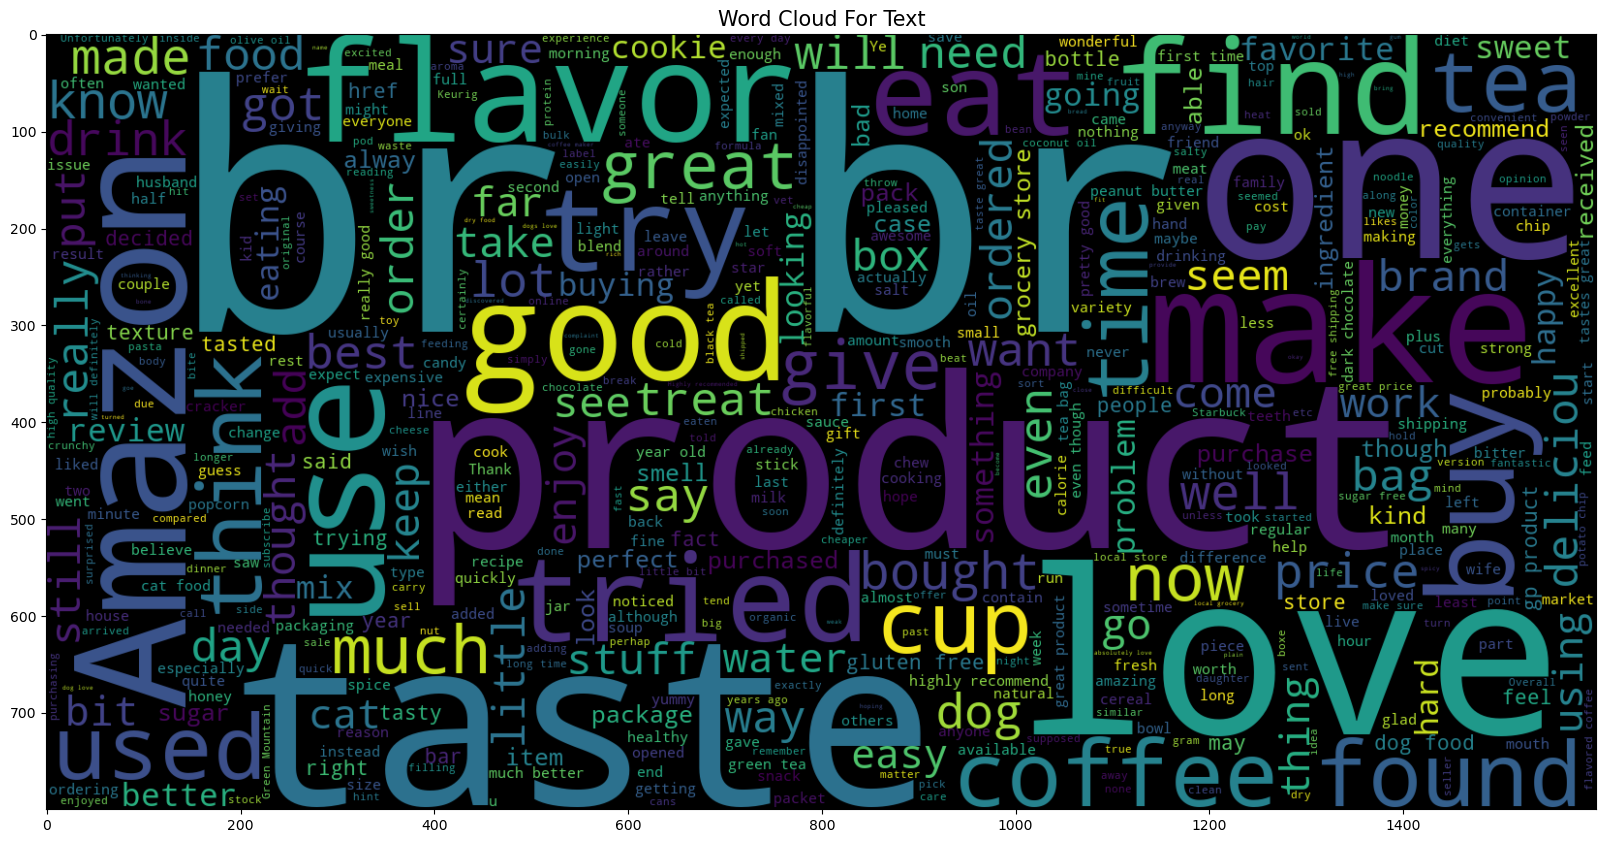

In [14]:
plt.figure(figsize=(20,15))
wc = WordCloud(width=1600 , height=800 , max_words=500).generate(" ".join(df["Text"]))
plt.imshow(wc , interpolation="bilinear")
plt.title("Word Cloud For Text" , fontsize=15)


In [15]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'length_of_Text', 'cleaned_text', 'length_of_cleaned_text'],
      dtype='object')

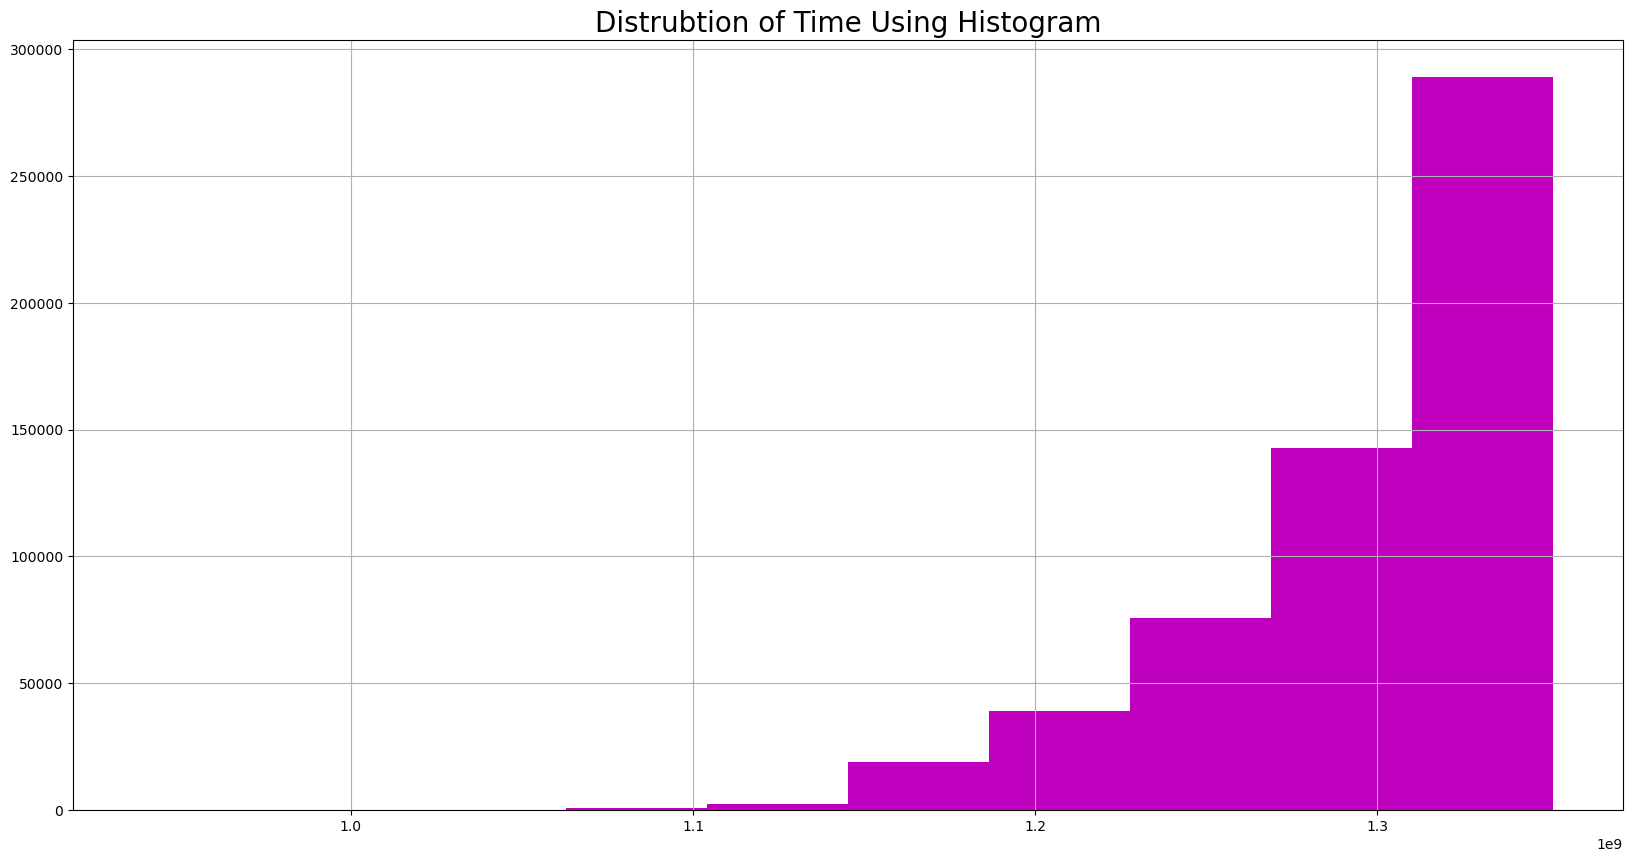

In [16]:
plt.figure(figsize=(20,10))
df['Time'].hist(color="m")
plt.title("Distrubtion of Time Using Histogram", fontsize=20)
plt.show()

In [17]:
df.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
length_of_Text             0
cleaned_text               0
length_of_cleaned_text     0
dtype: int64

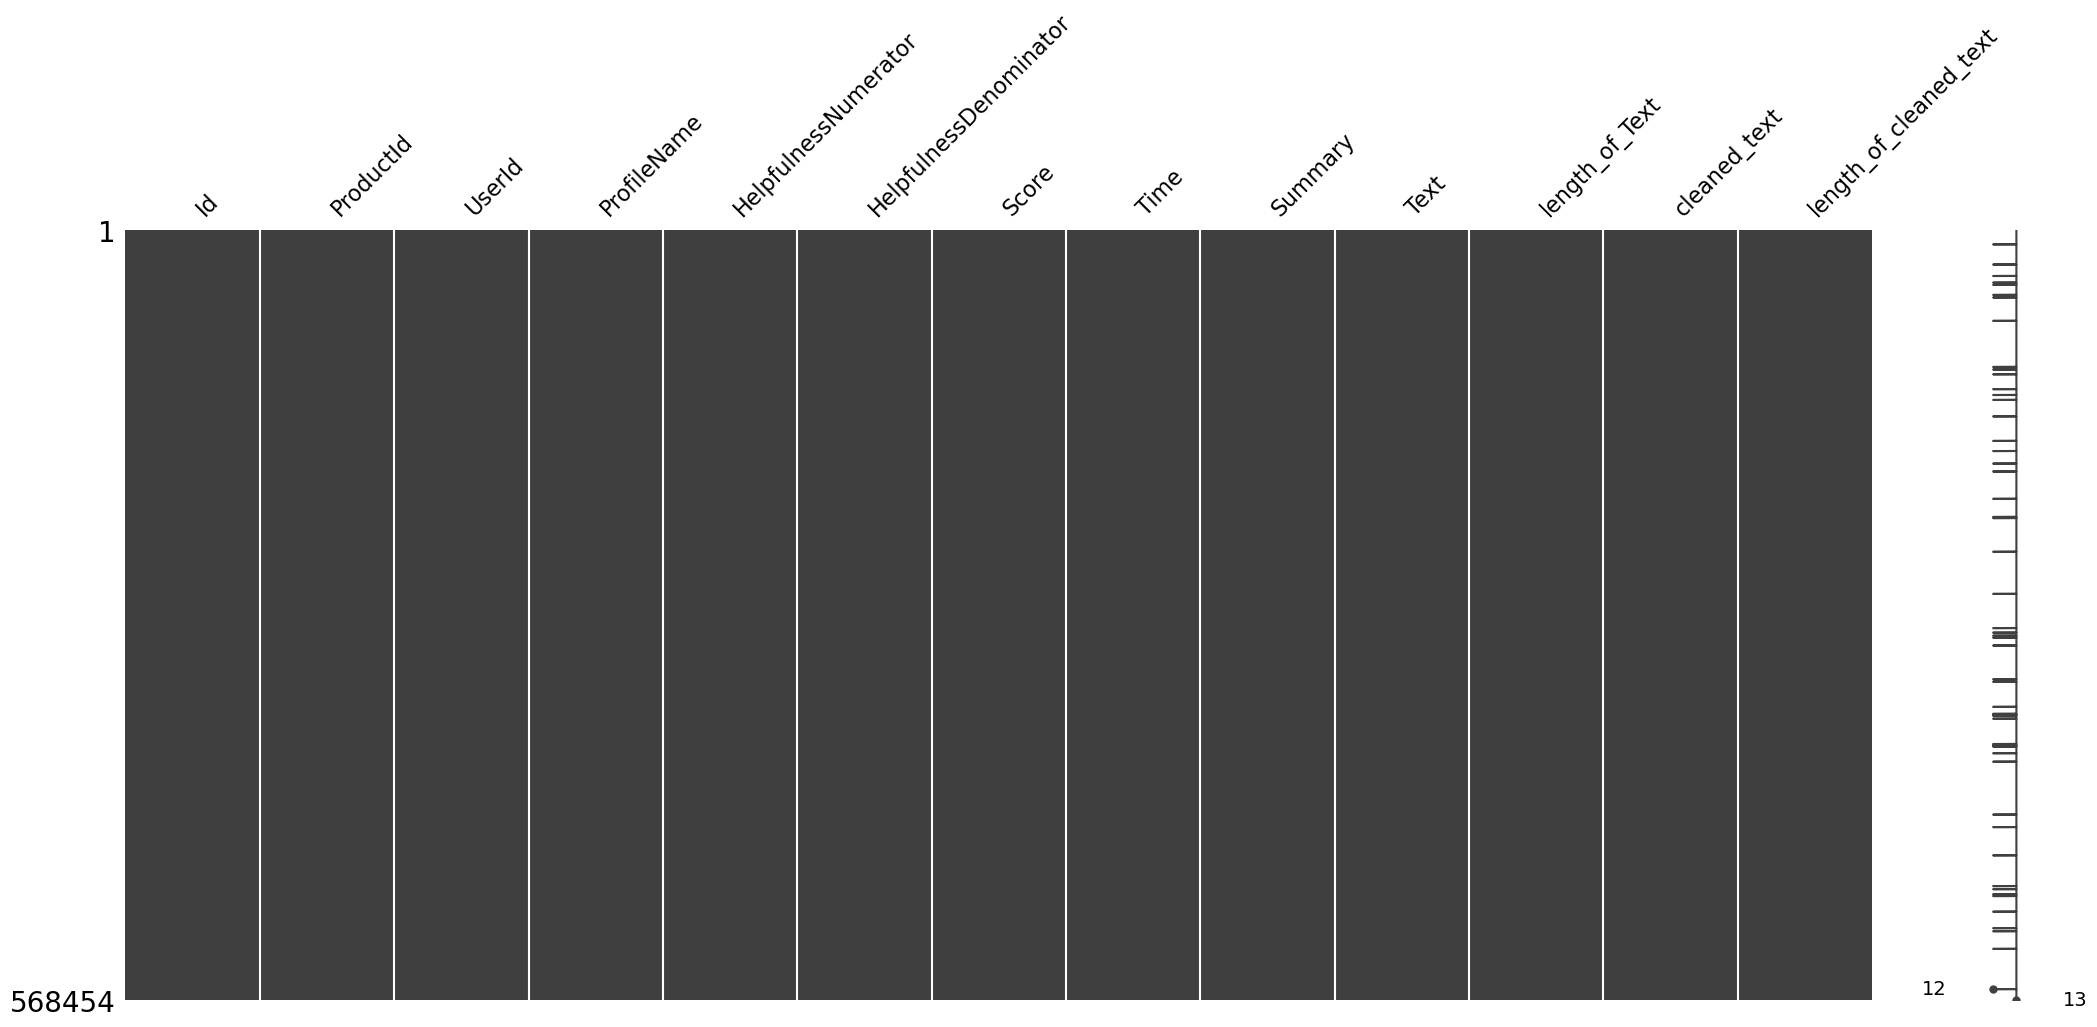

In [18]:
mis.matrix(df)
plt.show()

In [19]:
df = df.dropna()
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,length_of_Text,cleaned_text,length_of_cleaned_text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263,product better product better,29
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190,product jumbo product jumbo,27
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509,tiny tiny treat witch treat witch,33
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219,,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,140,great taffy great taffy taffy,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,149,,0
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,252,flavor flavor,13
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",372,star dog dog ingredient star food ingredient f...,58
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,200,,0


In [20]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
length_of_Text            0
cleaned_text              0
length_of_cleaned_text    0
dtype: int64

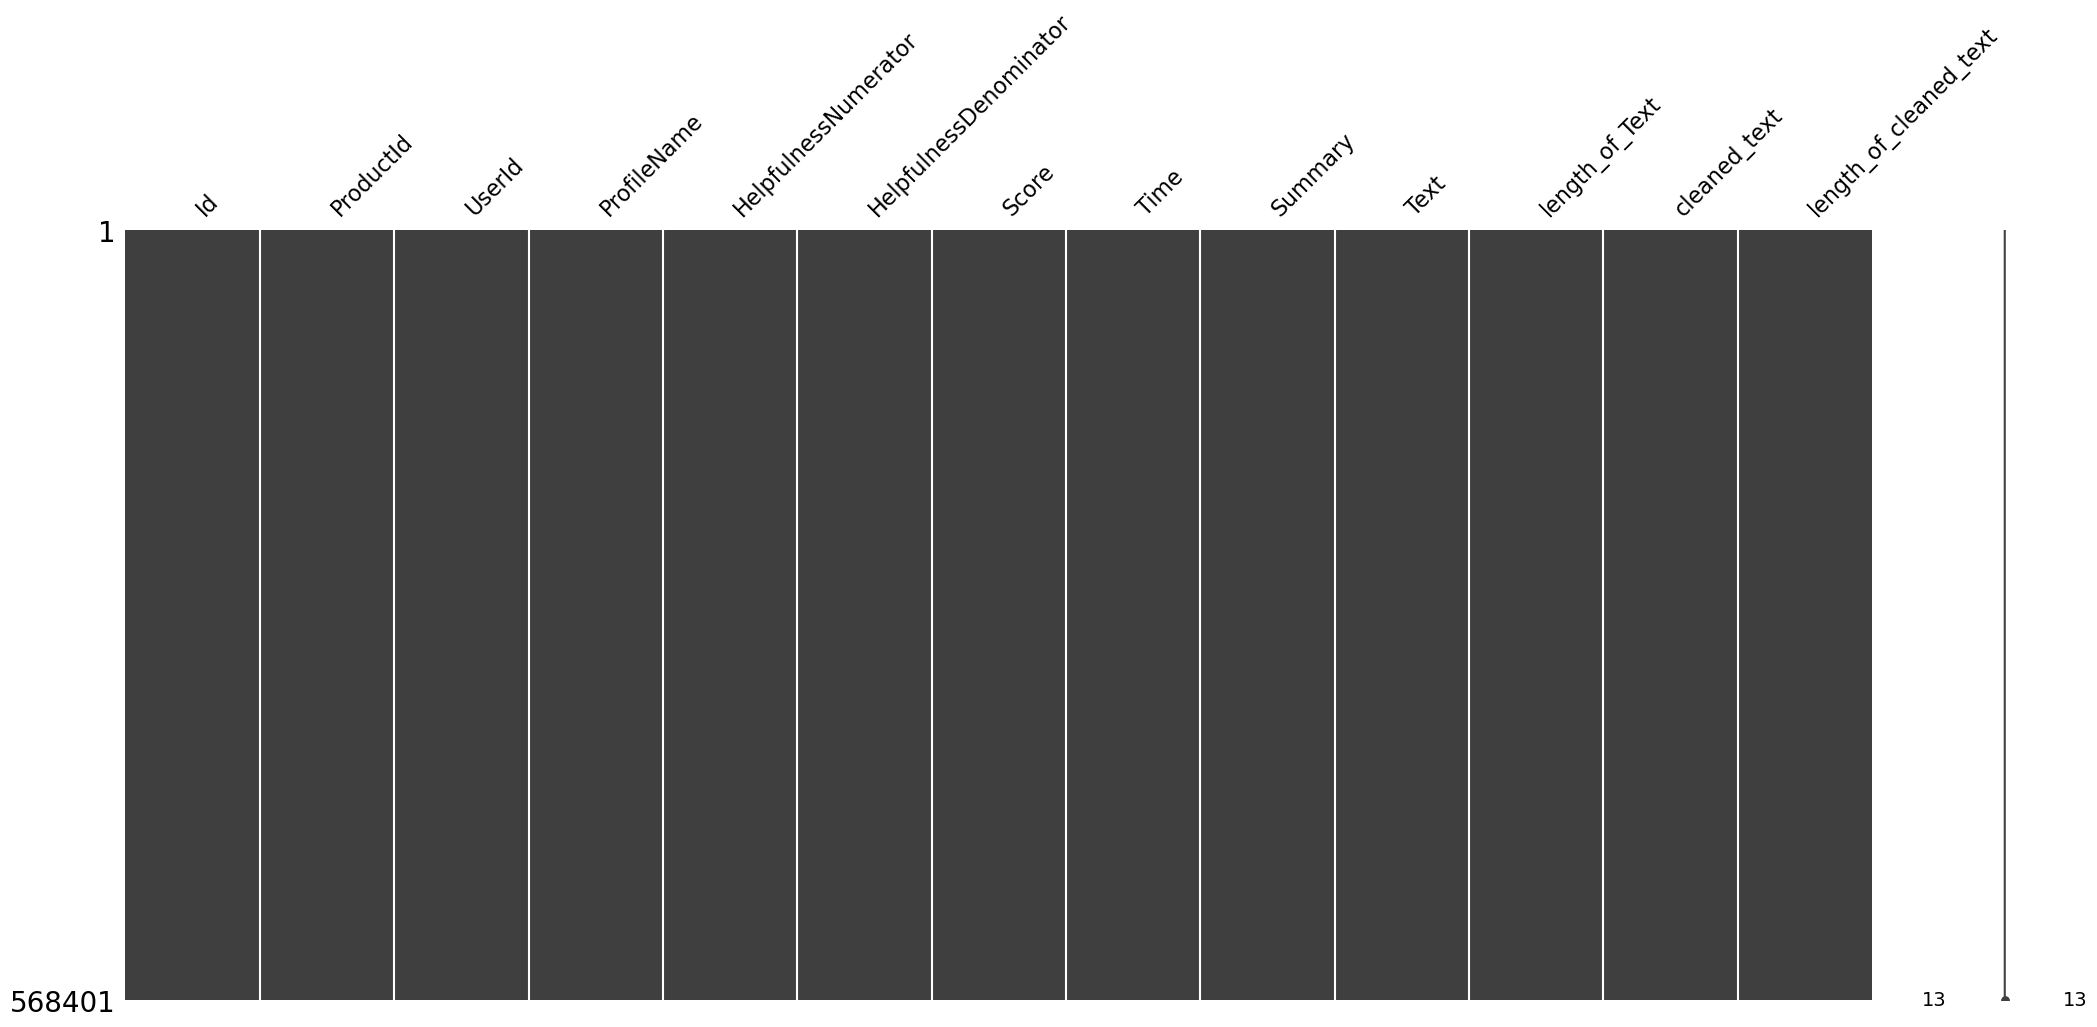

In [21]:
mis.matrix(df)
plt.show()

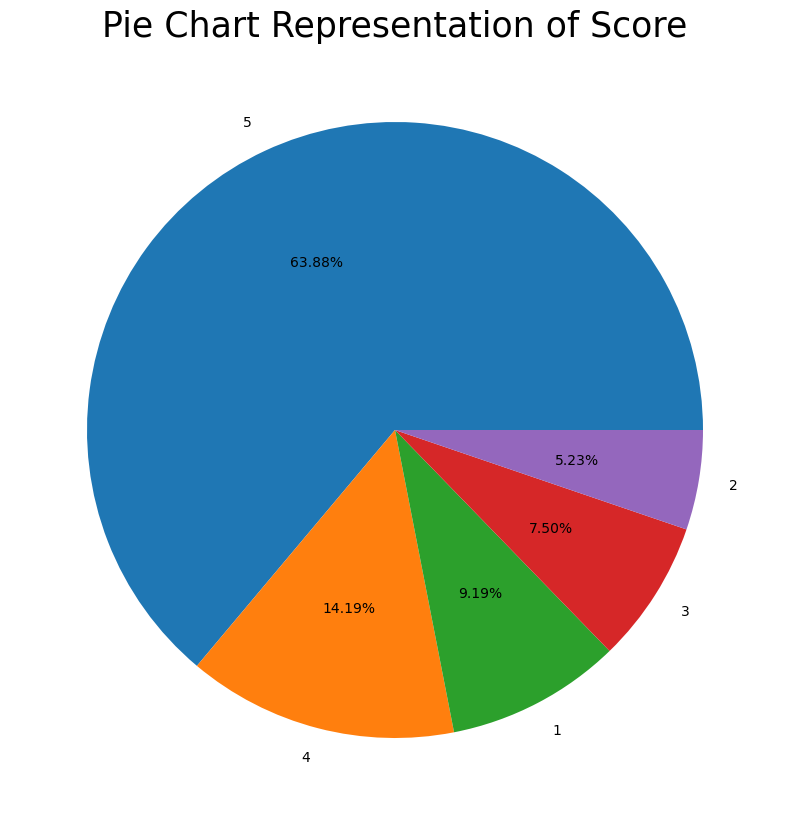

In [57]:
cal_cou = df["Score"].value_counts()
sizes = cal_cou.values  # The counts
labels = cal_cou.index  # The Score values

plt.figure(figsize=(15,10))
plt.pie(sizes, labels=labels, autopct='1.1f%%')
plt.title('Pie Chart Representation of Score', fontsize=25)
plt.show()

In [23]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'length_of_Text', 'cleaned_text', 'length_of_cleaned_text'],
      dtype='object')

### SentimentIntensityAnalyzer is a class from the VADER sentiment analysis library. It’s commonly used for sentiment analysis on English text and can evaluate whether text has a positive, negative, or neutral tone.

In [24]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm


In [25]:
#  calculates the sentiment score for each row of text in a DataFrame

siana = SentimentIntensityAnalyzer()   # VADER

result = {}

for i , row in tqdm(df.iterrows() , total=len(df)) :
    text = row["Text"]
    myid = row["Id"]
    result[myid] = siana.polarity_scores(text)

  0%|          | 0/568401 [00:00<?, ?it/s]

In [26]:
vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns={"index" : "Id"})
vaders = vaders.merge(df , how="left")

In [27]:
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,length_of_Text,cleaned_text,length_of_cleaned_text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263,product better product better,29
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190,product jumbo product jumbo,27
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509,tiny tiny treat witch treat witch,33
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219,,0
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,140,great taffy great taffy taffy,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568396,568450,0.072,0.600,0.327,0.8589,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,149,,0
568397,568451,0.190,0.697,0.114,-0.4848,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,252,flavor flavor,13
568398,568452,0.037,0.884,0.078,0.4352,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",372,star dog dog ingredient star food ingredient f...,58
568399,568453,0.041,0.506,0.452,0.9717,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,200,,0


In [28]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,length_of_Text,cleaned_text,length_of_cleaned_text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263,product better product better,29
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190,product jumbo product jumbo,27
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509,tiny tiny treat witch treat witch,33
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219,,0
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,140,great taffy great taffy taffy,29


In VADER sentiment analysis, the `polarity_scores` method outputs four key sentiment metrics: `neg`, `neu`, `pos`, and `compound`. Here’s what each of these scores represents in detail:

### 1. `neg` (Negative)
- **Range**: 0 to 1
- **Meaning**: The likelihood or intensity of negative sentiment in the text.
- **Interpretation**: A higher `neg` score indicates a stronger negative sentiment. For example, phrases like "terrible experience" or "worst day" would likely yield a high `neg` score.

### 2. `neu` (Neutral)
- **Range**: 0 to 1
- **Meaning**: The proportion of text that is perceived as neutral.
- **Interpretation**: A high `neu` score means the text contains many neutral or non-emotional words, reflecting little to no strong emotion. For instance, factual or straightforward statements like "The product was delivered on time" would have a high `neu` score.

### 3. `pos` (Positive)
- **Range**: 0 to 1
- **Meaning**: The likelihood or intensity of positive sentiment in the text.
- **Interpretation**: A higher `pos` score suggests a stronger positive sentiment. Sentiments like "amazing service" or "very happy" would result in a high `pos` score.

### 4. `compound` (Overall Sentiment Score)
- **Range**: -1 to 1
  - -1 represents the most extreme negative sentiment.
  - +1 represents the most extreme positive sentiment.
- **Meaning**: The `compound` score combines `neg`, `neu`, and `pos` into a single, overall sentiment score for the text.
- **Interpretation**: This score is often used to classify text as generally positive, negative, or neutral. Common thresholds are:
  - `compound >= 0.05`: Positive sentiment
  - `compound <= -0.05`: Negative sentiment
  - `-0.05 < compound < 0.05`: Neutral sentiment

### Example
Consider the text "The product quality is excellent but delivery was delayed." The sentiment scores might look like:
- **`neg`**: 0.2
- **`neu`**: 0.6
- **`pos`**: 0.2
- **`compound`**: 0.4 (indicating a generally positive tone with some negative aspects)

These scores provide a quantitative measure of sentiment in the text, with `compound` serving as a convenient summary of the overall emotional tone.

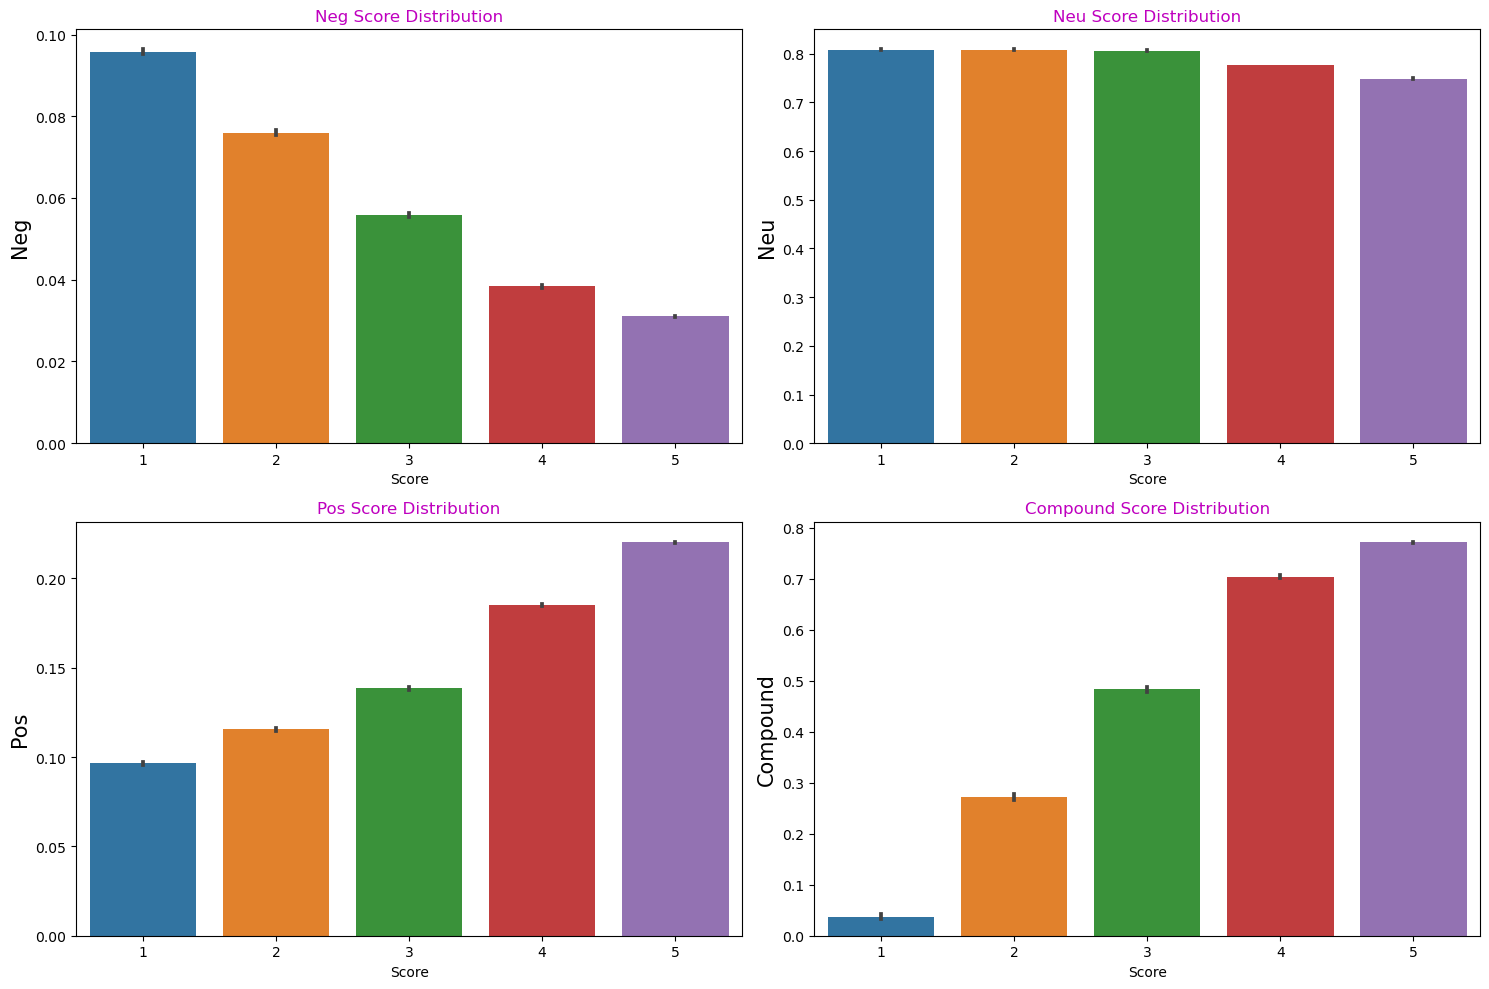

In [29]:
plt.figure(figsize=(15, 10))

# List of sentiment columns to plot
sentiments = ["neg", "neu", "pos", "compound"]

for index, sentiment in enumerate(sentiments, 1):
    plt.subplot(2, 2, index)  
    sns.barplot(data=vaders, x="Score", y=sentiment) 
    plt.title(f'{sentiment.capitalize()} Score Distribution' , color="m")
    plt.xlabel('Score')
    plt.ylabel(sentiment.capitalize() , fontsize=15)

plt.tight_layout()
plt.show()

In [30]:
vaders.columns

Index(['Id', 'neg', 'neu', 'pos', 'compound', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text', 'length_of_Text', 'cleaned_text',
       'length_of_cleaned_text'],
      dtype='object')

In [31]:
pd.DataFrame(vaders["Text"][:20])

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...
5,I got a wild hair for taffy and ordered this f...
6,This saltwater taffy had great flavors and was...
7,This taffy is so good. It is very soft and ch...
8,Right now I'm mostly just sprouting this so my...
9,This is a very healthy dog food. Good for thei...


In [32]:
pd.DataFrame(vaders["cleaned_text"][:20])

,cleaned_text
0,product better product better
1,product jumbo product jumbo
2,tiny tiny treat witch treat witch
3,
4,great taffy great taffy taffy
5,taffy taffy taffy
6,candy candy
7,
8,
9,dog good good dog


In [35]:
cc = vaders["neg"] + vaders["neu"] + vaders["pos"] + vaders["compound"]
len(cc)

568401

In [37]:
len(X)

568401

In [38]:
# Split
X = vaders["cleaned_text"]
y = vaders["neg"] + vaders["neu"] + vaders["pos"] + vaders["co sdmpound"]


In [39]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Shape of X: (568401,)
Shape of y: (568401,)


In [40]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

print(f"X Train Shape is ==== > {X_train.shape}")
print(f"X Test Shape is ==== > {X_test.shape}")
print(f"y Train Shape is ==== > {y_train.shape}")
print(f"y Test Shape is ==== > {y_test.shape}")

X Train Shape is ==== > (454720,)
X Test Shape is ==== > (113681,)
y Train Shape is ==== > (454720,)
y Test Shape is ==== > (113681,)


## TF-IDF (Term Frequency-Inverse Document Frequency) in NLP
### ---------------------------------------------------------
### TF-IDF is a numerical statistic used to reflect the importance of a word 
### in a document relative to a collection of documents (corpus). It combines 
### two metrics:
#
### - **Term Frequency (TF)**: Measures how frequently a term appears in a document.
###   It is calculated as the ratio of the number of times a term appears to 
###   the total number of terms in the document.
#
### - **Inverse Document Frequency (IDF)**: Measures how important a term is 
###   across the corpus. It is calculated as the logarithm of the total number 
###   of documents divided by the number of documents containing the term.
#
### The final TF-IDF score is the product of TF and IDF, giving higher scores 
### to terms that are frequent in a specific document but rare across the corpus. 
### This helps in highlighting important words for tasks such as document 
### classification, clustering, and information retrieval.


In [47]:
# TF-IDF Word Level
tf_idf_word_vectorizer = TfidfVectorizer()

x_train_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X_train)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(X_test)

In [48]:
# TF-IDF N-Gram Level (2,2)
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 2))

x_train_tf_idf_ngram = tf_idf_ngram_vectorizer.fit_transform(X_train)
x_test_tf_idf_ngram = tf_idf_ngram_vectorizer.transform(X_test)

In [50]:
clf = XGBClassifier(
    n_estimators=100,
    learning_rate=0.10,
    max_depth=7,
    subsample=0.9,
    colsample_bytree=0.8,  
    reg_alpha=0.1,
    reg_lambda=0.1,
    verbosity=0,  # To suppress warnings, use verbosity=0
)

# Fit the model with the TF-IDF transformed training data
model = clf.fit(x_train_tf_idf_ngram, y_train)
pred = model.predict(x_test_tf_idf_ngram)

In [ ]:
# End